# Modelando um Pêndulo Extensível


### Importando bibliotecas e funções

In [116]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


### Defindo alguns parâmetros iniciais

In [117]:
# Variáveis Globais

l0 = 0.3 # Comprimento natural da mola (m)
m = 0.2 # Massa da esfera (Kg)
k = 10 # Constante elástica da mola (N/m)
g = 10 # Gravidade (m/s^2)
R = 0.1 # Raio da esfera (m)
Cd = 1.5 # Coeficiente de arrasto 
rho = 1 # Densidade do ar (Kg/m^3)
A = pi*(R**2)

# Condições iniciais
x_0 = 0.55 # (m)
vx_0 = 0 # (m)
y_0 = 0 # (m)
vy_0 = 0 # (m)

cond_ini = [x_0, y_0, vx_0, vy_0]

tf = 20 # (s)
dt = 0.001 # (s)
lista_t = np.arange(0, tf, dt)


### Criando as funções modelos

In [118]:
def modelo_no_arrasto(X, t):
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]

    l = sqrt((x**2)+(y**2))
    dxdt = vx
    dydt = vy
    dvxdt = (-k*x + k*x*l0/l)/m
    dvydt = (-k*y + k*y*l0/l - m*g)/m

    dXdt = [dxdt, dydt, dvxdt, dvydt]

    return dXdt

def modelo_si_arrasto(X, t):
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]

    v_linha = sqrt((vx**2) + (vy**2))
    Dx = -(rho*Cd*A)*vx*v_linha/2
    Dy = -(rho*Cd*A)*vy*v_linha/2
    term_x = k*x*l0/sqrt(x**2 + y**2)
    term_y = k*y*l0/sqrt(x**2 + y**2)

    dxdt = vx
    dydt = vy
    dvxdt = (-k*x + term_x + Dx)/m
    dvydt = (-k*y + term_y + Dy - m*g)/m

    dXdt = [dxdt, dydt, dvxdt, dvydt]

    return dXdt




### Rodando as odeints e salvando seus valores

In [119]:
dados_no_arrasto = odeint(modelo_no_arrasto, cond_ini, lista_t)

lista_x_no_arrasto = dados_no_arrasto[:,0]
lista_y_no_arrasto = dados_no_arrasto[:,1]
lista_vx_no_arrasto = dados_no_arrasto[:,2]
lista_vy_no_arrasto = dados_no_arrasto[:,3]

dados_si_arrasto = odeint(modelo_si_arrasto, cond_ini, lista_t)

lista_x_si_arrasto = dados_si_arrasto[:,0]
lista_y_si_arrasto = dados_si_arrasto[:,1]
lista_vx_si_arrasto = dados_si_arrasto[:,2]
lista_vy_si_arrasto = dados_si_arrasto[:,3]



### Plotando o gráfico da posição

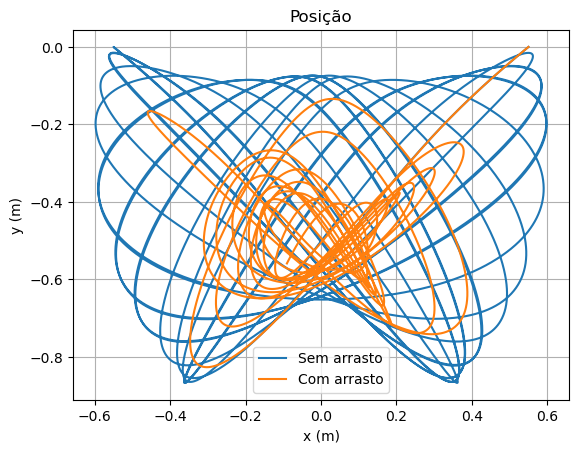

In [120]:
plt.plot(lista_x_no_arrasto, lista_y_no_arrasto, label = 'Sem arrasto')
plt.plot(lista_x_si_arrasto, lista_y_si_arrasto, label='Com arrasto')
plt.legend()
plt.title('Posição')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.show()

### Plotando o gráfico da posição em x ao longo do tempo

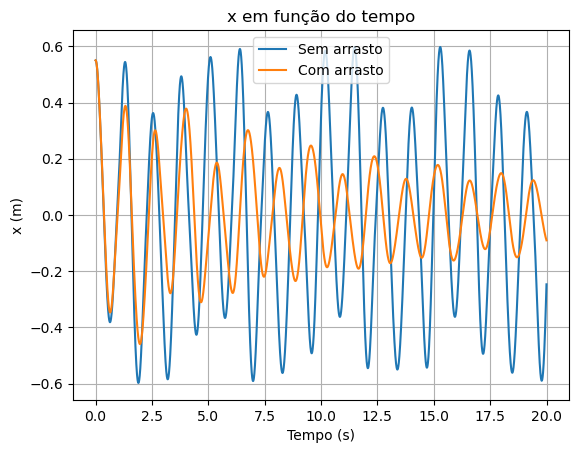

In [121]:
plt.plot(lista_t, lista_x_no_arrasto, label = 'Sem arrasto')
plt.plot(lista_t, lista_x_si_arrasto, label = 'Com arrasto')
plt.legend()
plt.title('x em função do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('x (m)')
plt.grid()
plt.show()


### Plotando o gráfico da posição em y ao longo do tempo

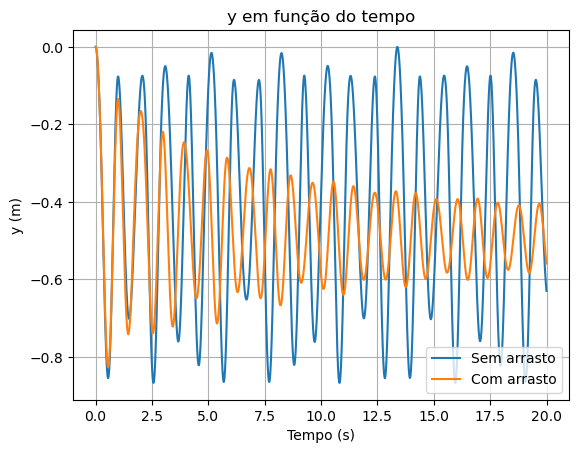

In [122]:
plt.plot(lista_t, lista_y_no_arrasto, label = 'Sem arrasto')
plt.plot(lista_t, lista_y_si_arrasto, label = 'Com arrasto')
plt.legend()
plt.title('y em função do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('y (m)')
plt.grid()
plt.show()